<a href="https://colab.research.google.com/github/sym33/Colab/blob/main/TensorflowundKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
### Wie man Placeholder nutzen kann
import tensorflow as tf 
tf.compat.v1.disable_eager_execution()

x = tf.compat.v1.placeholder("float", [None, 3]) 
y = x * 2 

with tf.compat.v1.Session() as session: 
	x_data = [[1, 2, 3], [4, 5, 6],] 
	result = session.run(y, feed_dict={x: x_data}) 
	print(result)


[[ 2.  4.  6.]
 [ 8. 10. 12.]]


In [4]:
import tensorflow as tf 
tf.__version__

'2.11.0'

In [1]:
import tensorflow as tf 
from tensorflow.python.framework.ops import enable_eager_execution
enable_eager_execution()
msg = tf.constant('Hello, TensorFlow!') 
print(msg)
tf.print(msg)



tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)
Hello, TensorFlow!


In [2]:
tf.compat.v1.disable_eager_execution()

In [3]:
import tensorflow as tf
import numpy as np
tf.compat.v1.disable_eager_execution()



### Grapheneinstieg mit Placeholder erstellen, ohne Initialwerte (None), mit 2 Attributen für x
### Variablen enthalten dann die Tensoren! 
x = tf.compat.v1.placeholder(tf.float32, shape= (None, 2))
y = tf.compat.v1.placeholder(tf.float32, shape=(None, 1)) 

### Variablen w und b, die initialisiert werden und die Operation w*x + b als Modell=output
w = tf.Variable(tf.compat.v1.truncated_normal(shape= [2,1], stddev=0.5))
b = tf.Variable(tf.compat.v1.random_normal([1]))
output = tf.add(tf.compat.v1.matmul(x, w), b)

### Kostenfunktion, wichtig: 0-Axe steht für Zeilen und 1-Axis für Spalten
cost = tf.reduce_sum(tf.square(output-y)) 

### Nutze GradientDescent mit Lernrate 0.00001, die auf die Kostenfunktion angewendet wird
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost)

### Wenn man will, kann man als Gegenwert von cost noch den Mean Squared Error hineinnehmen
mse = tf.reduce_mean(tf.square(y - output))


In [4]:
### HYPERPARAMETER
### batch_size: wieviele Trainingsdaten zum Schätzen, epochs: 2 Gesamtdurchläufe
learning_rate = 0.00001
batch_size = 100
epochs = 2

### Iterable ist range(train_inputs.shape[0]), n ist batch_size
def batch(iterable, n):
	l = len(iterable)
	for ndx in range(0, l, n):
		yield iterable[ndx:min(ndx + n, l)]

In [5]:
import numpy
from sklearn import datasets
from sklearn.model_selection import train_test_split

### Daten (hier kein Pre-Processing)
inp, outp = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, 
	noise=3, coef=False, random_state=333) 

#### Default ist eine Auftrennung von 0.75 zu 0.25 Testdatensätze
train_x, test_x, train_y, test_y = train_test_split(inp, outp)
train_y = numpy.reshape(train_y, (train_y.shape[0], 1))
test_y = numpy.reshape(test_y, (test_y.shape[0], 1))


In [6]:
import numpy as np
with tf.compat.v1.Session() as s:
    s.run(tf.compat.v1.global_variables_initializer())
    for epoch in range(epochs): 
      for bb in batch(range(train_x.shape[0]), batch_size):
        print(type(bb))
        s.run(optimizer, feed_dict={ x: train_x[bb], y: train_y[bb] })
        train_loss = s.run(cost, feed_dict={x: train_x[bb], y: train_y[bb] })
        print('Epoch {:>2}, Batch {} - Training Loss: {:>10.4f}'.format(epoch + 1, bb, train_loss)) 
        mse_value = s.run(mse, feed_dict={ x: test_x, y: test_y })
      print('Mean Squared Error: {}'.format(mse_value))
      print("The weights are: {}".format(s.run(w))) 
      print("and the bias is: {}".format(s.run(b)))


<class 'range'>
Epoch  1, Batch range(0, 100) - Training Loss: 29860.8789
<class 'range'>
Epoch  1, Batch range(100, 200) - Training Loss: 19228.6484
<class 'range'>
Epoch  1, Batch range(200, 300) - Training Loss: 32104.9141
<class 'range'>
Epoch  1, Batch range(300, 400) - Training Loss: 29209.0605
<class 'range'>
Epoch  1, Batch range(400, 500) - Training Loss: 21956.6992
<class 'range'>
Epoch  1, Batch range(500, 600) - Training Loss: 18996.3496
<class 'range'>
Epoch  1, Batch range(600, 700) - Training Loss: 25784.7539
<class 'range'>
Epoch  1, Batch range(700, 750) - Training Loss: 14783.9385
Mean Squared Error: 265.596923828125
The weights are: [[-0.68421537]
 [ 0.7649579 ]]
and the bias is: [-0.54164296]
<class 'range'>
Epoch  2, Batch range(0, 100) - Training Loss: 29054.5059
<class 'range'>
Epoch  2, Batch range(100, 200) - Training Loss: 18686.1348
<class 'range'>
Epoch  2, Batch range(200, 300) - Training Loss: 31219.6816
<class 'range'>
Epoch  2, Batch range(300, 400) - Tr

In [7]:
#### Einfach den Datensatz laden und dann daraus ein Pandas-Dataframe machen
from sklearn.datasets import load_diabetes
import pandas as pd
X, y = load_diabetes(return_X_y=True)
df = pd.DataFrame(X)
df.head()


,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

iris = datasets.load_iris()
X= iris.data
y= iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeClassifier() # erst Objekt kreieren
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
print(score)


0.9333333333333333


In [9]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train) ,(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2), 
                                    tf.keras.layers.Dense(10, 
                                    activation='softmax')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 
history = model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)


11490434/11490434 [==============================] - 0s 0us/step
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 184us/sample - loss: 0.2929 - accuracy: 0.9153
Epoch 2/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1422 - accuracy: 0.9573
Epoch 3/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1042 - accuracy: 0.9687
Epoch 4/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0868 - accuracy: 0.9728
Epoch 5/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0745 - accuracy: 0.9764


/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.07022765497383661, 0.9783]

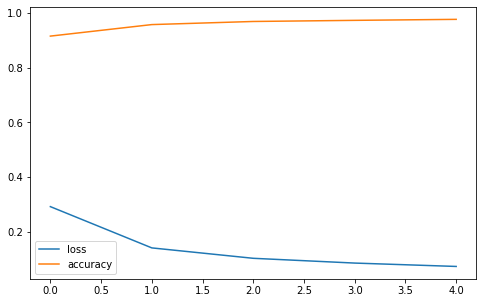

In [10]:
from matplotlib import pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [11]:
### Keras Modell erstellen

import tensorflow
model = tensorflow.keras.models.Sequential() 
model.add(tensorflow.keras.Input(shape=(16,))) 
model.add(tensorflow.keras.layers.Dense(32, activation='relu')) 
print(model.output_shape) 
print(model.summary())


(None, 32)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                544       
                                                                 
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________
None
